# Importing Required Libaries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,accuracy_score

import pickle

import warnings
warnings.simplefilter("ignore")

# Read the Data:

In [2]:
data=pd.read_csv(r"E:\Protfolio Projects\Machince Learning\cyberbylling detection\Dataset\youtube_parsed_dataset.csv")

# Data Description:

In [3]:
data.head(5)

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


In [4]:
data.tail(5)

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
3459,3464,X3465,She pretty I love this song I miss the old kel...,15,2,4,7,0,23,1
3460,3465,X3466,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,4,28,4,23,1,15,0
3461,3466,X3467,JR so cute EXO M Better I agree like yeah yeah...,23,0,5,3,0,33,0
3462,3467,X3468,! !,5,0,6,5,0,38,0
3463,3468,X3469,great video and MERRY CHRISTMAS from greece :*...,27,220,4,30,0,18,0


In [5]:
data.shape
print("No.of rows in the data:",data.shape[0])
print("No.of  columns in the data:",data.shape[1])

No.of rows in the data: 3464
No.of  columns in the data: 10


# Data Preprocessing:
1) check any duplicates value in the dataset.
2) convert Text to numerical Terms.

In [6]:
dataset=data.drop(["index","UserIndex","Number of Comments","Number of Subscribers","Membership Duration","Number of Uploads","Profanity in UserID","Age"],axis=1)

In [7]:
dataset.head(5)

,Text,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0
1,There are so many things that are incorrect wi...,0
2,3:26 hahah my boyfriend showed this song to me...,1
3,dick beyonce fuck y a ass hole you are truely ...,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0


In [8]:
def case_conversion():
    dataset.Text=[i.lower() for i in dataset.Text.values]
    
def replace_shorthands():
       shorthands = {
        "u": "you",
        "r": "are",
        "ur": "your",
        "im": "I am",
        "dont": "do not",
        "cant": "cannot",
        "wont": "will not",
        "ill": "I will",
        "btw": "by the way",
        "omg": "oh my god",
        "wouldn't":"would not",
        "i've":"i have",
        "y'all":"you all",
        "don't":"do not",
        "i'm":"i am",
        "can't":"cannot not",
        "he's":"he is"
        # Add more shorthands as needed
    }
       pattern = re.compile(r'\b(' + '|'.join(re.escape(word) for word in shorthands.keys()) + r')\b')
       dataset.Text = [pattern.sub(lambda x: shorthands[x.group()], text)for text in dataset.Text.values]
       
    
def remove_specials():
    dataset.Text=[re.sub(r"[^a-zA-z]"," ",text)for text in dataset.Text.values]
    
def Normalize_spaces():
    dataset.Text=[re.sub(r"\s+"," ",text) for text in dataset.Text.values]

In [9]:
case_conversion()
replace_shorthands()
remove_specials()
Normalize_spaces()

In [10]:
dataset["Text"][0]

'does n e bodyelse hear her crazy ass screamin hoe everytime she say s stupid hoe lol did n e body see chris browns face at wen nicki was touchin him if you worked out we would not be lookin at that body d she looks so tired she has ah tatto on her ass wtf is this o o instagram deze nutt s in yo mouth lmao this video song made me ah lil umm in the mood ___ we re all in this together motherfucka wow you have an amazing voice and i have never said that about anyone '

In [11]:
x=dataset["Text"]
x.head(5)

0    does n e bodyelse hear her crazy ass screamin ...
1    there are so many things that are incorrect wi...
2     hahah my boyfriend showed this song to me i l...
3    dick beyonce fuck y a ass hole you are truely ...
4    donghaetaemin and kai a luhansehun and bacon x...
Name: Text, dtype: object

In [12]:
y=dataset["oh_label"]
y

0       0
1       0
2       1
3       1
4       0
       ..
3459    1
3460    0
3461    0
3462    0
3463    0
Name: oh_label, Length: 3464, dtype: int64

In [13]:
dataset["oh_label"].value_counts()

0    3047
1     417
Name: oh_label, dtype: int64

# Data Transformation:
converting categorical values into numerical terms using TFIDF vectors...

In [14]:
TFIDF=TfidfVectorizer()
X=TFIDF.fit_transform(x)
print(X)

  (0, 1766)	0.08104362543133858
  (0, 176)	0.05398655520004745
  (0, 34781)	0.07013269292979427
  (0, 27526)	0.06754219470701223
  (0, 1511)	0.03287290827577696
  (0, 43583)	0.07434844925477611
  (0, 1343)	0.0677976008640735
  (0, 1474)	0.0577905478400924
  (0, 17706)	0.08151160171893303
  (0, 45002)	0.07256210051945962
  (0, 26499)	0.18673241461210388
  (0, 41039)	0.10263958806526263
  (0, 1117)	0.04619213021641356
  (0, 33010)	0.06258543814604112
  (0, 1)	0.14685116637523807
  (0, 26357)	0.1519332600498972
  (0, 40348)	0.029661408789179958
  (0, 42242)	0.13196295124540572
  (0, 23359)	0.10300677871568541
  (0, 25133)	0.040686390939914226
  (0, 24337)	0.06630433040846669
  (0, 37525)	0.05080821429797832
  (0, 43266)	0.04955347766708931
  (0, 23634)	0.09288794119834279
  (0, 26557)	0.10746582272652991
  :	:
  (3463, 39547)	0.17517032468664848
  (3463, 26477)	0.033643860029967235
  (3463, 45227)	0.09723363160075407
  (3463, 21360)	0.06787159067776263
  (3463, 16340)	0.051290255316497405

# Resampling:
converting Imbalanced data into Balanced data using SMOTE:

In [15]:
smote=SMOTE(sampling_strategy="minority")
X_sm,y_sm=smote.fit_resample(X,y)

  File "e:\Protfolio Projects\Machince Learning\cyberbylling detection\cyberbylling\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\Protfolio Projects\Machince Learning\cyberbylling detection\cyberbylling\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\Protfolio Projects\Machince Learning\cyberbylling detection\cyberbylling\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\Protfolio Projects\Machince Learning\cyberbylling detection\cyberbylling\lib\subprocess.py", line 1307, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [16]:
y_sm.value_counts()

0    3047
1    3047
Name: oh_label, dtype: int64

# Splitting the data into training data and Testing data: training_data=80% ; Testing_data=20%

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.20)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4875, 46129)
(1219, 46129)
(4875,)
(1219,)


# Model Training:

In [19]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.9132307692307692

In [20]:
LR.score(X_test,y_test)

0.8539786710418376

In [21]:
y_pred_LR=LR.predict(X_test)

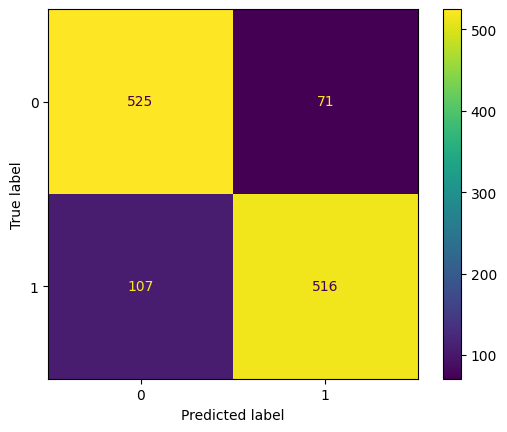

In [22]:
cm=confusion_matrix(y_test,y_pred_LR)
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

In [23]:
print("Accurcay_score for Logistic Regression:",accuracy_score(y_test,y_pred_LR))
print("Precision_score for Logistic Regression:",precision_score(y_test,y_pred_LR))
print("Recall_score for Logistic regression:",recall_score(y_test,y_pred_LR))

Accurcay_score for Logistic Regression: 0.8539786710418376
Precision_score for Logistic Regression: 0.879045996592845
Recall_score for Logistic regression: 0.8282504012841091


In [24]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT.score(X_train,y_train)

0.9987692307692307

In [25]:
DT.score(X_test,y_test)

0.8654634946677605

In [26]:
y_pred_DT=DT.predict(X_test)

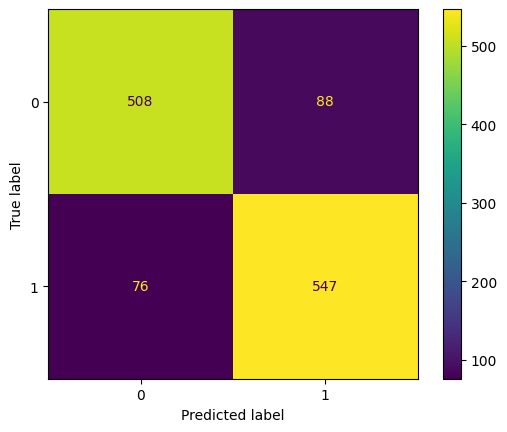

In [27]:
cm=confusion_matrix(y_test,y_pred_DT)
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

In [28]:
print("Accurcay_score for DecisionTreeClassifier is:",accuracy_score(y_test,y_pred_DT))
print("Precison score for Decison Tree Classifier is:",precision_score(y_test,y_pred_DT))
print("Recall_score for DecsionTree Classifier is:",recall_score(y_test,y_pred_DT))

Accurcay_score for DecisionTreeClassifier is: 0.8654634946677605
Precison score for Decison Tree Classifier is: 0.8614173228346457
Recall_score for DecsionTree Classifier is: 0.8780096308186196


In [29]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
RF.score(X_train,y_train)

0.9987692307692307

In [30]:
RF.score(X_test,y_test)

0.9589827727645611

In [31]:
y_pred_RF=RF.predict(X_test)

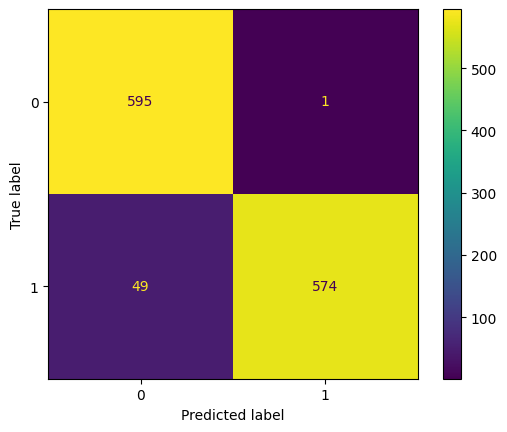

In [32]:
cm=confusion_matrix(y_test,y_pred_RF)
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

In [33]:
print("Accurcay_score for RandomForestClassifier is:",accuracy_score(y_test,y_pred_RF))
print("Precison score for RandomForestClassifier is:",precision_score(y_test,y_pred_RF))
print("Recall_score for RandomForestClassifier is:",recall_score(y_test,y_pred_RF))

Accurcay_score for RandomForestClassifier is: 0.9589827727645611
Precison score for RandomForestClassifier is: 0.9982608695652174
Recall_score for RandomForestClassifier is: 0.9213483146067416


In [34]:
# Formating into Pickle:
pickle.dump(RF,open(r"E:\Protfolio Projects\Machince Learning\cyberbylling detection\Notebook/RF.pkl","wb"))

In [35]:
loaded_model=pickle.load(open(r"E:\Protfolio Projects\Machince Learning\cyberbylling detection\Notebook\RF.pkl","rb"))

In [36]:
y_prediction=loaded_model.predict(X_test)
y_prediction

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [37]:
comments=[data["Text"][3459]]
comments

["She pretty I love this song I miss the old kelly Ok rihanna ^___^ yess I love this song U will be missed I agree with you ^__^ On repeat like I love her ^____^ yesss Tamar ^___^ Yesssss rihanna This song is for my bae Yes I know that's right This my song This my shit ayyyyy I like this song"]

In [38]:
vect=TFIDF.transform(comments).toarray()
result=loaded_model.predict(vect)
result

array([1], dtype=int64)

In [39]:
if result==0:
    print("Cyberbylling")
else:
    print("Non_bylling")

Non_bylling
